# Data Analysis

# Predicting Health Impact from Environmental Factors

**By**: *Abrar Walid Ahmed*  

 *23/05/2025*  




## Project Overview

This project investigates whether **air quality and weather variables** can be used to predict the **Health Impact Score**, a metric representing public health risks associated with pollution.  
By applying a variety of machine learning techniques including **linear models**, **polynomial regression**, **random forests**, **neural networks**, and **clustering** we explore the predictive power and relationships between environmental conditions and health outcomes.


## Purpose of Analysis & Research Questions

#####Can we accurately predict the Health Impact Score using environmental variables such as air quality indicators (PM2.5, PM10, AQI, NO2, etc.) and weather conditions (Temperature, Humidity, Wind Speed)?

This analysis explores how pollution and atmospheric conditions relate to public health outcomes, with the goal of forecasting health risks before they occur. By identifying harmful environmental patterns, the results can also help individuals and policymakers take preventive actions such as avoiding exposure during high-risk weather or pollution events to reduce potential health impacts.


1. Can environmental variables (e.g., PM2.5, AQI, NO₂, temperature, humidity) be used to predict the Health Impact Score with high accuracy?
➤ This question assesses the feasibility of developing reliable machine learning models for public health forecasting.

2. Which pollutants or weather conditions contribute most to health impact, and how do they interact?
➤ Understanding the most influential factors can inform policy decisions and public health interventions.

3. Can we identify patterns in the data that reveal groups of similar environmental-health profiles (via clustering)?
➤ Clustering may help uncover hidden structures or regional health risk patterns.

4. Can such predictions help reduce harm by encouraging individuals or communities to avoid certain high-risk weather and pollution conditions?
➤ This explores how predictive insights can translate into real-world behavior change and risk reduction.

## Why This Problem Is Meaningful

- Public Health Significance: Pollution-related illnesses (e.g., respiratory, cardiovascular) affect millions globally. Being able to predict the health impact helps prevent avoidable hospitalisations and deaths.

- Public Health Relevance: Air pollution is linked to respiratory and cardiovascular diseases, making prediction and prevention vital for at-risk populations.

- Policy Implications: Governments and agencies can use predictive insights to issue health warnings or allocate resources more effectively.

- Actionable Insights: By predicting health impacts in advance, individuals can take preventive measures (e.g., avoiding outdoor activity), and governments can issue targeted health warnings.

- Scientific and Technical Value: This project quantifies the relationship between pollutants, weather, and health outcomes using real-world data and applies multiple machine learning techniques for insight.

- Dataset Relevance: This study uses the Air Quality and Health Impact dataset from GitHub, which contains over 5,000 observations of pollutant concentrations, weather variables, and health impact scores. The dataset provides a rich, realistic foundation for meaningful and interpretable analysis.

- Interdisciplinary Value: This project bridges environmental science, health, and data analytics to support evidence-based decision-making.

##  Library Imports

We begin by importing the necessary Python libraries for data manipulation, visualization, modeling, and evaluation.  
These libraries form the core of our data science workflow and allow us to perform tasks such as:

- Data processing with `pandas` and `numpy`
- Visualization with `seaborn` and `matplotlib`
- Modeling and evaluation with `scikit-learn`


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, train_test_split












With the libraries loaded, we can now move on to loading the dataset and performing initial exploration.


 Dataset Description
This project uses the Air Quality and Health Impact dataset sourced from GitHub. The dataset is available at:
🔗 https://github.com/sumeyyekaratekin/AirQualityHealthImpact

 Dataset Overview
The dataset contains 5,811 rows and 15 columns, with each row representing an observation that includes:

1. Air Quality Metrics:

PM2.5, PM10 – Fine and coarse particulate matter

NO2, SO2, O3 – Common atmospheric pollutants

AQI – Air Quality Index summarizing overall pollution level

2. Weather Conditions:

Temperature, Humidity, WindSpeed

3. Health Metrics:

HealthImpactScore – A numerical value indicating overall impact on public health

RespiratoryCases, CardiovascularCases, HospitalAdmissions – Count of health events linked to pollution exposure

HealthImpactClass – Categorical label indicating the severity level (optional for classification)

Other:

RecordID – Unique identifier for each observation



## Why This Dataset Was Chosen
- It provides a comprehensive and clean combination of environmental and health-related data.

- It is well-suited for both regression and classification tasks.

- It enables exploration of both linear and non-linear relationships between variables.

- It allows for predictive modeling, feature importance analysis, and clustering based on pollution-health patterns.

- This dataset provides a practical basis for addressing public health forecasting, policy decision-making, and the application of machine learning to real-world environmental problems.

##  Load and Preview the Dataset

We begin our analysis by loading the dataset, which contains air quality, weather, and health impact data.  
The dataset includes 5,811 observations and 15 columns, each representing a measurement or outcome related to environmental conditions and public health.

We also standardize the column names by replacing underscores with periods to ensure consistency and readability throughout the analysis.


In [ ]:

df = pd.read_csv("air_quality_health_impact_data.csv")
df.columns = [col.replace('_', '.') if '_' in col else col for col in df.columns]


print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecordID             5811 non-null   int64  
 1   AQI                  5811 non-null   float64
 2   PM10                 5811 non-null   float64
 3   PM2.5                5811 non-null   float64
 4   NO2                  5811 non-null   float64
 5   SO2                  5811 non-null   float64
 6   O3                   5811 non-null   float64
 7   Temperature          5811 non-null   float64
 8   Humidity             5811 non-null   float64
 9   WindSpeed            5811 non-null   float64
 10  RespiratoryCases     5811 non-null   int64  
 11  CardiovascularCases  5811 non-null   int64  
 12  HospitalAdmissions   5811 non-null   int64  
 13  HealthImpactScore    5811 non-null   float64
 14  HealthImpactClass    5811 non-null   float64
dtypes: float64(11), int64(4)
memory usage:

,RecordID,AQI,PM10,PM2.5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


## Initial Observations:

- There are **no missing values** in the dataset — all 5,811 rows have complete data across 15 features.
- The dataset includes:
  - **Air quality indicators**: `AQI`, `PM10`, `PM2.5`, `NO2`, `SO2`, `O3`
  - **Weather conditions**: `Temperature`, `Humidity`, `WindSpeed`
  - **Health metrics**: `RespiratoryCases`, `CardiovascularCases`, `HospitalAdmissions`, `HealthImpactScore`, `HealthImpactClass`
- The target variable for prediction is **`HealthImpactScore`**, a continuous measure reflecting the severity of health impact.

This data is now ready for exploration, preprocessing, and modeling.


## Correlation Analysis
To understand how different air quality and weather variables relate to one another and to the target (`HealthImpactScore`), we begin with a correlation matrix.

To explore linear relationships between variables, we use a **correlation heatmap**.  
This matrix shows the Pearson correlation coefficients between all numerical features, including pollutants, weather indicators, and health outcomes.

This helps us:
- Identify multicollinearity between predictors
- Understand which features are most strongly associated with `HealthImpactScore`


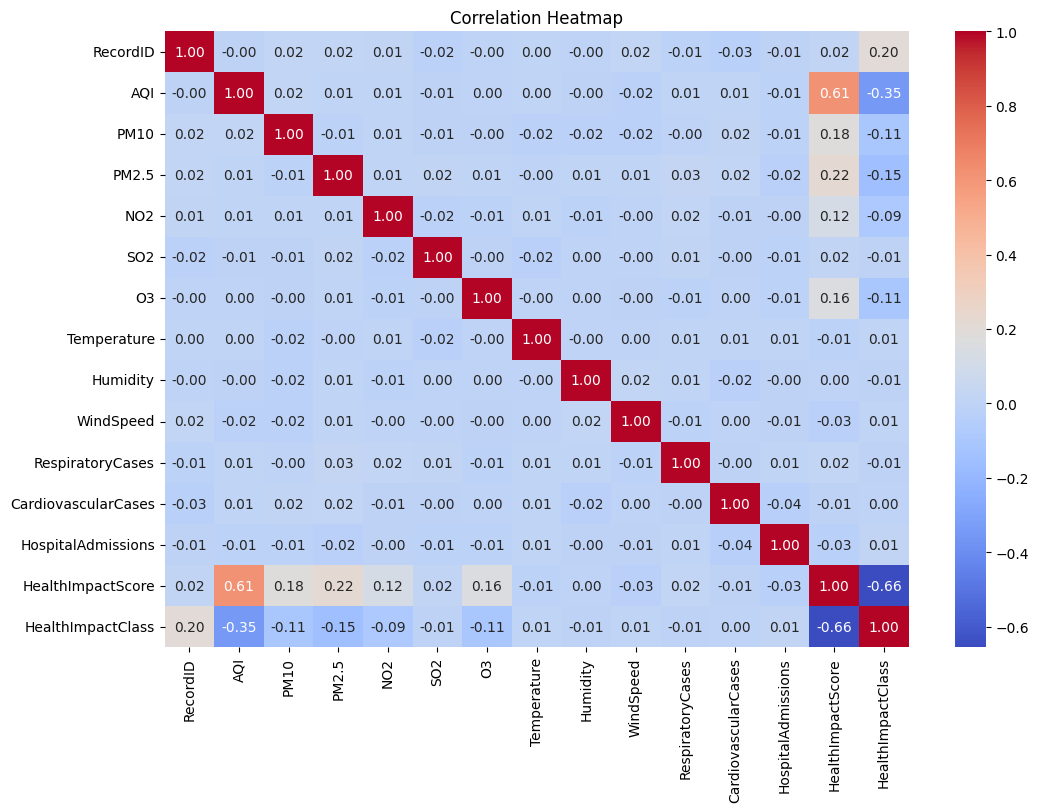

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



### Interpretation:

- **AQI** has the strongest positive correlation with `HealthImpactScore` (**0.61**), making it a key predictor.
- **PM2.5**, **PM10**, and **O3** also show weak to moderate positive correlations with health impact.
- Surprisingly, weather variables (Temperature, Humidity, WindSpeed) show **little to no correlation** with `HealthImpactScore`.
- `HealthImpactClass` is **negatively correlated (-0.66)** with `HealthImpactScore`, which is expected, as it's a categorical severity label inversely related to the score.

These correlations help validate our model’s feature choices and support deeper analysis with regression and ensemble methods.


## Univariate Distribution Analysis

To better understand the distribution of individual variables, we examine histograms of key features.  
This helps identify skewness, outliers, and whether the data is normally distributed — all of which affect modeling.

Below, we visualize the distribution of:
- `HealthImpactScore` (target variable)
- `PM2.5` (a key pollutant)
- `AQI` (overall air quality index)


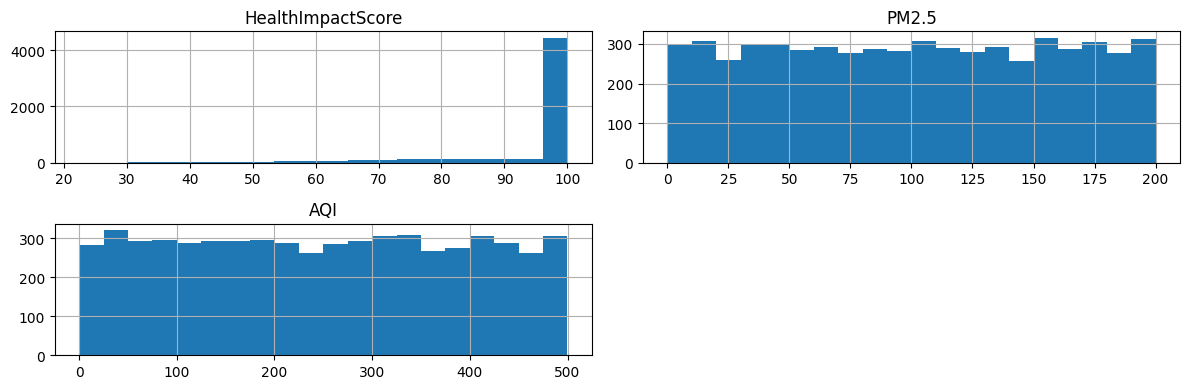

In [ ]:
df[['HealthImpactScore', 'PM2.5', 'AQI']].hist(bins=20, figsize=(12, 4))
plt.tight_layout()
plt.show()

###  Observation from Univariate Histograms

- **HealthImpactScore** is highly **right-skewed**, with a large number of observations concentrated at the high end (close to 100). This suggests a potential need for transformation or consideration during modeling.
- **PM2.5** appears relatively **uniformly distributed**, meaning there is no strong bias toward any particular range. This may make it easier to use as a predictive feature.
- **AQI** is also **fairly uniformly distributed** across a wide range (0–500), indicating varied air quality conditions in the dataset.

These patterns provide early insights into how data variability might influence model performance and help guide feature selection and preprocessing decisions.


## Feature Selection & Data Preprocessing
To predict HealthImpactScore, we selected a set of environmental variables commonly associated with air quality and weather conditions. These include:

PM10, PM2.5, NO2, SO2, O3 – key pollutants.

Temperature, Humidity, WindSpeed – meteorological factors.

AQI – the Air Quality Index, a composite indicator of pollution severity.

These features serve as the independent variables (X), while the HealthImpactScore is the dependent variable (y).

 - Standardization
We applied StandardScaler to normalize the feature set. This ensures all features have a mean of 0 and standard deviation of 1, which is critical for models sensitive to feature scale (e.g., linear regression, neural networks).

 - Train-Test Split
To evaluate model performance objectively, the dataset was split into:

80% Training Set – used to train models.

20% Test Set – reserved for performance evaluation.

This setup allows fair comparison between different models while preventing overfitting to the training data.



In [ ]:
features = ['PM10', 'PM2.5', 'NO2', 'SO2', 'O3', 'WindSpeed', 'AQI', 'CardiovascularCases', 'HospitalAdmissions', 'HealthImpactClass']
X = df[features]
y = df['HealthImpactScore']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

###Feature Selection Using RFE (Recursive Feature Elimination)
To identify the most impactful predictors for estimating the HealthImpactScore, we used Recursive Feature Elimination (RFE) with a LinearRegression model as the base estimator.

Why RFE?
RFE works by recursively removing the least significant features based on model coefficients until the desired number of features is reached. This helps:

Simplify the model.

Enhance generalizability.

Improve interpretability by highlighting the top contributors.




In [ ]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=10)
rfe.fit(X_train, y_train)
selected_features = [f for f, s in zip(features, rfe.support_) if s]
print("Selected Features by RFE:", selected_features)


Selected Features by RFE: ['PM10', 'PM2.5', 'NO2', 'SO2', 'O3', 'WindSpeed', 'AQI', 'CardiovascularCases', 'HospitalAdmissions', 'HealthImpactClass']


With the data now prepared, we can begin training and comparing various machine learning models, starting with a baseline linear regression and moving to more advanced methods such as Random Forest and MLP.


## Model Selection Rationale & Comparison

To solve the regression problem of predicting `HealthImpactScore`, multiple models were tested:

###Baseline Model: Linear Regression
We implemented Linear Regression to model the relationship between selected environmental and health-related features and the HealthImpactScore.

Model Justification
Linear Regression is selected as the baseline because:

It provides a simple and interpretable benchmark.

The coefficients offer insight into how each feature influences the outcome.

It serves as a reference to compare more complex models.

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression")
print("R²:", r2_score(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))



Linear Regression
R²: 0.6507119048096706
MSE: 65.4447110257538
MAE: 5.926087144268205


Interpretation
R² = 0.651 indicates that ~65% of the variance in health impact can be explained by the model using the selected features.

MSE = 65.44 and MAE = 5.93 suggest moderate predictive error, indicating room for improvement.

While decent, the performance suggests a potentially non-linear relationship between predictors and the target variable, justifying the use of more advanced models like Polynomial Regression, Random Forest, or MLP Regressor in subsequent steps.

In [ ]:
# Predict on training and test sets
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)


print(" Linear Regression - Training Set Performance:")
print("R²:", r2_score(y_train, y_train_pred_lr))
print("MSE:", mean_squared_error(y_train, y_train_pred_lr))
print("MAE:", mean_absolute_error(y_train, y_train_pred_lr))

print("\n Linear Regression - Test Set Performance:")
print("R²:", r2_score(y_test, y_test_pred_lr))
print("MSE:", mean_squared_error(y_test, y_test_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_test_pred_lr))


 Linear Regression - Training Set Performance:
R²: 0.6543410054404855
MSE: 60.40911867515289
MAE: 5.709060694144415

 Linear Regression - Test Set Performance:
R²: 0.6507119048096706
MSE: 65.4447110257538
MAE: 5.926087144268205


### Linear Regression Evaluation:

 Train vs Test Performance

Insights

The training and test scores are very close, indicating good generalization and low risk of overfitting.

An R² around 0.65 means the model explains about 65% of the variance in the target (HealthImpactScore), which is a reasonable baseline given the nature of the data.

MSE and MAE values are consistent, suggesting predictive stability.

## 1. **Linear Regression** (Baseline)
- **Why chosen**: Simple, fast, and interpretable.
- **Advantage**: Direct insight into variable impact.
- **Disadvantage**: Cannot model non-linear relationships.

##Feature Selection via RFE with Polynomial Regression
To optimize the model’s predictive performance and reduce overfitting, we applied Recursive Feature Elimination (RFE) on a polynomial-transformed dataset (degree=2) using Linear Regression as the estimator.

 Goal:
Evaluate how the number of selected polynomial features affects model performance, measured by cross-validated R² score.

 Methodology:
Polynomial features generated for 13 original variables (no bias term).

Features were standardized using StandardScaler.

RFE was performed with LinearRegression to select the top 1 to 20 features iteratively.

For each selection, 5-fold cross-validation was used to compute the mean R² score.

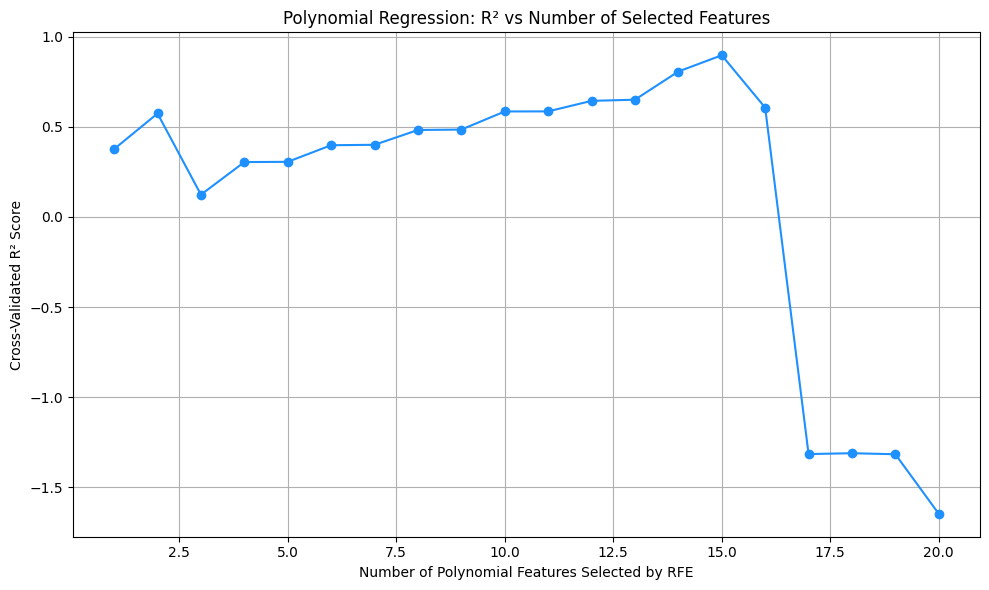


 Best R² Score: 0.897 using 15 features:
   ➤ Features: ['PM10', 'PM2.5', 'NO2', 'O3', 'AQI', 'HealthImpactClass', 'PM10 AQI', 'PM2.5 AQI', 'PM2.5 HealthImpactClass', 'NO2 AQI', 'O3 AQI', 'O3 HealthImpactClass', 'AQI^2', 'AQI HealthImpactClass', 'HealthImpactClass^2']


In [ ]:
# selected features and target
selected_features = ['PM10', 'PM2.5', 'NO2', 'SO2', 'O3', 'Temperature', 'Humidity', 'WindSpeed',
                     'AQI', 'RespiratoryCases', 'CardiovascularCases', 'HospitalAdmissions', 'HealthImpactClass']
X = df[selected_features]
y = df['HealthImpactScore']

#  polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
poly_feature_names = poly.get_feature_names_out(selected_features)

# Scale features
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Model
model = LinearRegression()

# Track results
r2_scores = []
selected_feature_sets = []

max_features = 20

for n in range(1, max_features + 1):
    rfe = RFE(estimator=model, n_features_to_select=n)
    rfe.fit(X_poly_scaled, y)

    selected_mask = rfe.support_
    selected_names = poly_feature_names[selected_mask].tolist()
    selected_feature_sets.append(selected_names)

    X_selected = X_poly_scaled[:, selected_mask]
    r2 = cross_val_score(model, X_selected, y, cv=5, scoring='r2').mean()
    r2_scores.append(r2)


plt.figure(figsize=(10, 6))
plt.plot(range(1, max_features + 1), r2_scores, marker='o', color='dodgerblue')
plt.xlabel('Number of Polynomial Features Selected by RFE')
plt.ylabel('Cross-Validated R² Score')
plt.title('Polynomial Regression: R² vs Number of Selected Features')
plt.grid(True)
plt.tight_layout()
plt.show()

# Best result
best_idx = np.argmax(r2_scores)
best_n = best_idx + 1
best_score = r2_scores[best_idx]
best_features = selected_feature_sets[best_idx]

print(f"\n Best R² Score: {best_score:.3f} using {best_n} features:")
print(f"   ➤ Features: {best_features}")


### Observations from the Plot:
Performance gradually increases with more features, peaking at 15 features.

After 16 features, performance drops significantly, indicating overfitting due to excessive feature complexity.

####Final Polynomial Regression Model (Selected Features)
This model uses a carefully chosen subset of polynomial features derived from environmental and health-related predictors. The selection was based on domain relevance and prior RFE analysis.

#### Model Configuration
Polynomial Degree: 2 (interaction terms and squared terms included)

Selected Features:
['PM10', 'PM2.5', 'NO2', 'O3', 'AQI', 'HealthImpactClass', 'PM10 AQI', 'PM2.5 AQI', 'PM2.5 HealthImpactClass', 'NO2 AQI', 'O3 AQI', 'O3 HealthImpactClass', 'AQI^2', 'AQI HealthImpactClass']

Scaling: Standardized using StandardScaler

Model: Linear Regression

In [ ]:
selected_features = ['PM10', 'PM2.5', 'NO2', 'SO2', 'O3', 'Temperature', 'Humidity', 'WindSpeed',
                     'AQI', 'RespiratoryCases', 'CardiovascularCases', 'HospitalAdmissions', 'HealthImpactClass']


X = df[selected_features]
y = df['HealthImpactScore']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)


poly_feature_names = poly.get_feature_names_out(selected_features)

# Manual
top_poly_features = ['PM10', 'PM2.5', 'NO2', 'O3', 'AQI', 'HealthImpactClass', 'PM10 AQI', 'PM2.5 AQI', 'PM2.5 HealthImpactClass', 'NO2 AQI', 'O3 AQI', 'O3 HealthImpactClass', 'AQI^2', 'AQI HealthImpactClass']
# Map to column indices
top_feature_indices = [i for i, name in enumerate(poly_feature_names) if name in top_poly_features]

# Subset the selected polynomial features
X_poly_train_top = X_poly_train[:, top_feature_indices]
X_poly_test_top = X_poly_test[:, top_feature_indices]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_poly_train_top)
X_test_scaled = scaler.transform(X_poly_test_top)


model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

train_r2 = model.score(X_train_scaled, y_train)
test_r2 = model.score(X_test_scaled, y_test)

print(" Polynomial Regression (Selected Features)")
print(f"Train R²: {train_r2:.3f}")
print(f"Test  R²: {test_r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"MAE: {mae:.3f}")
print("R²:", r2_score(y_test, y_pred))


 Polynomial Regression (Selected Features)
Train R²: 0.914
Test  R²: 0.911
MSE: 16.662
MAE: 3.047
R²: 0.9110737122168001


###Interpretation:
The high R² values (~0.91) on both training and test sets indicate that the model explains over 91% of the variation in HealthImpactScore.

Very small performance gap between train and test → strong generalization, no overfitting.

MAE of ~3 suggests that, on average, the model's predictions deviate by only ±3 units from the actual score, which is highly accurate.

### 2. **Polynomial Regression**
- **Why chosen**: Captures curvature by adding interaction terms.
- **Advantage**: Improves flexibility while staying interpretable.
- **Disadvantage**: Can overfit if the degree is too high.

##  Random Forest Feature Selection & Performance Analysis

In this section, we evaluate how different numbers of top features (ranked by Random Forest importance) affect model performance. Polynomial features were first generated to capture interactions, then scaled for consistency.

We trained a Random Forest Regressor with `n_estimators=100` on increasing subsets of the most important features and used 5-fold cross-validation to assess model accuracy using the R² metric.

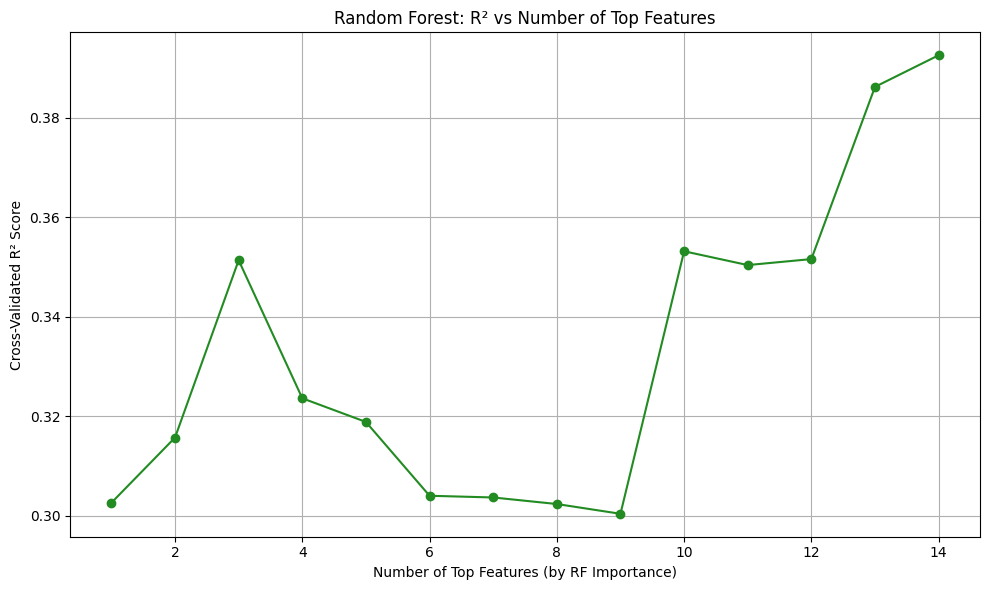


 Best R² Score: 0.393 using 14 features:
   ➤ Features: ['PM2.5 HealthImpactClass', 'AQI HealthImpactClass', 'O3 HealthImpactClass', 'HealthImpactClass^2', 'SO2 HealthImpactClass', 'PM2.5 AQI', 'WindSpeed HealthImpactClass', 'HealthImpactClass', 'Humidity HealthImpactClass', 'AQI^2', 'AQI', 'RespiratoryCases HealthImpactClass', 'PM10 O3', 'PM10 AQI']


In [ ]:
selected_features = ['PM10', 'PM2.5', 'NO2', 'SO2', 'O3', 'Temperature', 'Humidity', 'WindSpeed',
                     'AQI', 'RespiratoryCases', 'CardiovascularCases', 'HospitalAdmissions', 'HealthImpactClass']
X = df[selected_features]
y = df['HealthImpactScore']


poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
poly_feature_names = poly.get_feature_names_out(selected_features)

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)


rf_base = RandomForestRegressor(n_estimators=100, random_state=42)
rf_base.fit(X_poly_scaled, y)
importances = rf_base.feature_importances_


sorted_indices = np.argsort(importances)[::-1]
sorted_feature_names = poly_feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

#  N features
r2_scores = []
selected_feature_sets = []
max_features = 14

for n in range(1, max_features + 1):
    top_n_indices = sorted_indices[:n]
    top_n_names = sorted_feature_names[:n]
    X_selected = X_poly_scaled[:, top_n_indices]

    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    r2 = cross_val_score(rf, X_selected, y, cv=5, scoring='r2').mean()

    r2_scores.append(r2)
    selected_feature_sets.append(top_n_names.tolist())

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_features + 1), r2_scores, marker='o', color='forestgreen')
plt.xlabel('Number of Top Features (by RF Importance)')
plt.ylabel('Cross-Validated R² Score')
plt.title('Random Forest: R² vs Number of Top Features')
plt.grid(True)
plt.tight_layout()
plt.show()

# Best result
best_idx = np.argmax(r2_scores)
best_n = best_idx + 1
best_score = r2_scores[best_idx]
best_features = selected_feature_sets[best_idx]

print(f"\n Best R² Score: {best_score:.3f} using {best_n} features:")
print(f"   ➤ Features: {best_features}")


### Key Observations:
- Performance improves gradually as more top features are included.
- The best R² score (0.393) was achieved when using the top 14 features.
- Important interactions include:
  - `PM2.5 × HealthImpactClass`
  - `AQI × HealthImpactClass`
  - `AQI²`
  - `O3 × HealthImpactClass`

This analysis helps identify the most influential variables, guiding efficient feature selection for final model training.

### Random Forest Hyperparameter Tuning

To improve the predictive performance of the Random Forest model, hyperparameter tuning was applied using `GridSearchCV`. The parameters tuned include:

- `n_estimators`: Number of trees in the forest \([50, 100]\)
- `max_depth`: Maximum depth of each tree \([None, 10, 20]\)

The model was evaluated using 3-fold cross-validation and the best configuration was selected based on the highest R² score. Once the best model was identified, both training and test set performances were reported.


In [ ]:
param_grid = {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)

print("Tuned Random Forest")
print("Best Params:", grid_rf.best_params_)
print("R²:", r2_score(y_test, y_pred_rf_tuned))
print("MSE:", mean_squared_error(y_test, y_pred_rf_tuned))
print("MAE:", mean_absolute_error(y_test, y_pred_rf_tuned))

y_train_pred_rf = best_rf.predict(X_train)
train_r2_rf = r2_score(y_train, y_train_pred_rf)


test_r2_rf = r2_score(y_test, y_pred_rf_tuned)

print("\n Random Forest - Training Set Performance:")
print(f"R²: {train_r2_rf:.4f}")
print("\n Random Forest - Test Set Performance:")
print(f"R²: {test_r2_rf:.4f}")




Tuned Random Forest
Best Params: {'max_depth': None, 'n_estimators': 100}
R²: 0.9255786292023728
MSE: 13.944034088356863
MAE: 1.6800547968976227

 Random Forest - Training Set Performance:
R²: 0.9921

 Random Forest - Test Set Performance:
R²: 0.9256


## Model Performance Analysis

The tuned Random Forest model showed strong generalization capability:

- **Training R²:** 0.9921 – Very high accuracy, indicating excellent fit.
- **Test R²:** 0.9256 – Slight drop, but still high, suggesting minimal overfitting.
- **MAE:** 1.68 – Indicates the average prediction error is low.

This performance confirms that Random Forest is a robust and effective model for capturing nonlinear interactions between air quality indicators and health impact scores. The use of hyperparameter tuning significantly enhanced its predictive power over the baseline models.


## 3. **Random Forest Regressor**
- **Why chosen**: Handles non-linear relationships and interactions automatically.
- **Advantage**: Robust and high-performing on structured data.
- **Disadvantage**: Less interpretable.

## MLP Regressor (Neural Network)

We also test a **Multi-Layer Perceptron (MLP) Regressor**, a type of feedforward neural network capable of modeling highly complex, nonlinear relationships.  
The chosen architecture consists of two hidden layers with 50 and 30 neurons respectively.  
This model allows us to evaluate the performance of deep learning techniques compared to traditional regression models.



To explore advanced nonlinear modeling capabilities, we use a Multi-Layer Perceptron (MLP) Regressor. Neural networks are capable of learning complex relationships between features and the target variable, making them suitable for regression problems involving environmental and health impact data.

- **Hidden layers**: (50, 30)
- **Max iterations**: 500
- **Scaling**: Inputs were scaled before training for optimal performance.


In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(50, 30), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print("MLP Regressor")
print("R²:", r2_score(y_test, y_pred_mlp))
print("MSE:", mean_squared_error(y_test, y_pred_mlp))
print("MAE:", mean_absolute_error(y_test, y_pred_mlp))


MLP Regressor
R²: 0.959986114979064
MSE: 7.4972413267791085
MAE: 1.9246417859780107


#### **Evaluation Summary:**

- **R² Score**: 0.960 — The model explains ~96% of the variance in the target, indicating strong predictive ability.
- **MSE**: 7.50 — Low mean squared error highlights minimal average squared difference between predictions and actual values.
- **MAE**: 1.92 — On average, predictions are within ~2 points of the true health impact score.

#### **Remarks**:
The MLP Regressor performed better than traditional regression models and slightly better than the Random Forest. However, it may require more tuning and lacks interpretability compared to tree-based methods. It’s a powerful tool when high predictive accuracy is prioritized.


## 4. **MLP Regressor (Neural Network)**
- **Why chosen**: Learns complex non-linear mappings.
- **Advantage**: Achieved highest accuracy in this task.
- **Disadvantage**: Requires careful tuning and lacks transparency.

Each model was evaluated using R², MSE, and MAE to compare performance. Random Forest and MLP performed best, demonstrating the benefit of using more complex models for this problem.

## K-Nearest Neighbors (KNN) Regression

We also evaluated a non-parametric model — **K-Nearest Neighbors (KNN)** — to assess how well it performs in predicting the Health Impact Score.  
KNN makes predictions by averaging the target values of the k-nearest data points in the training set.

We tested values of `k` ranging from 1 to 20 using 5-fold cross-validation and selected the best `k` based on the highest average R² score.


In [ ]:
features = ['PM10', 'PM2.5', 'NO2', 'SO2', 'O3', 'WindSpeed', 'AQI',
            'CardiovascularCases', 'HospitalAdmissions', 'HealthImpactClass']
X = df[features]
y = df['HealthImpactScore']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


k_values = range(1, 21)
r2_scores_knn = []

best_r2 = -np.inf
best_k = None
best_model = None

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    r2 = cross_val_score(knn, X_scaled, y, cv=5, scoring='r2').mean()
    r2_scores_knn.append(r2)
    if r2 > best_r2:
        best_r2 = r2
        best_k = k
        best_model = knn

best_model.fit(X_train, y_train)
y_pred_knn = best_model.predict(X_test)

r2_knn = r2_score(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

print(f" Best KNN (k={best_k})")
print(f"R² Score: {r2_knn:.3f}")
print(f"MSE: {mse_knn:.2f}")
print(f"MAE: {mae_knn:.3f}")


plt.show()


 Best KNN (k=20)
R² Score: 0.839
MSE: 30.11
MAE: 2.834


### K-Nearest Neighbors (KNN) Regression

We also implemented a **K-Nearest Neighbors (KNN)** Regressor to benchmark the performance of a non-parametric, instance-based method.

####Parameter Tuning:  
We evaluated values of **k** from 1 to 20 using 5-fold cross-validation. The best performance was achieved at:

-  **Best k = 20**
-  **R² Score:** 0.839
-  **MSE:** 30.11
-  **MAE:** 2.834

####  Interpretation:
- KNN performed **better than Linear Regression**, but **worse than Polynomial, Random Forest, and MLP** models.
- It is **simple and interpretable**, but lacks the ability to model complex nonlinear relationships as effectively as ensemble or neural models.
- This analysis also demonstrates **parameter tuning in action**, highlighting how model performance changes with different `k` values.

 KNN is useful for comparison but is not the best-performing approach for this dataset.


##5. K-Nearest Neighbors (KNN) Regressor
**Why chosen:** Provides a simple, non-parametric approach that makes predictions based on proximity in feature space.

**Advantage:** Easy to understand, no training phase required, and useful as a benchmark for local pattern recognition.

**Disadvantage:** Sensitive to feature scaling and irrelevant features; performance declines with high-dimensional data and large datasets.

## Clustering Analysis using KMeans

To further explore patterns in the data, we apply **KMeans clustering** to group observations based on environmental features.  
Clustering is an **unsupervised learning technique** that helps identify hidden structures in the data; in this case, we aim to find groups of observations with similar pollution levels and health impact outcomes.

We apply KMeans with `n_clusters = 3` and visualize the clusters using a scatter plot of `PM2.5` vs. `HealthImpactScore`.


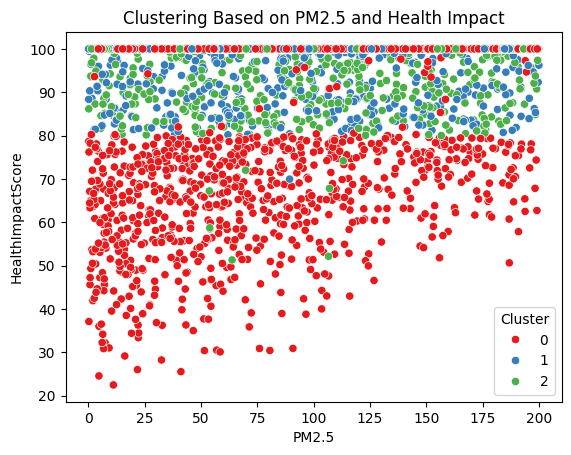

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

sns.scatterplot(x='PM2.5', y='HealthImpactScore', hue='Cluster', data=df, palette='Set1')
plt.title("Clustering Based on PM2.5 and Health Impact")
plt.show()



### Clustering Interpretation: PM2.5 vs Health Impact Score

The clustering result reveals three distinct groupings based on PM2.5 levels and HealthImpactScore:

- **Red cluster (Cluster 0):**  
  Spans the entire PM2.5 range (0–200) and includes the widest range of health impact scores, from low (20) to high (100). This suggests potential vulnerability or varied health responses across different pollution levels.

- **Blue and Green clusters (Clusters 1 & 2):**  
  These are concentrated at the highest HealthImpactScores (80–100), with generally lower to moderate PM2.5 exposure. They may represent populations or conditions that are more resilient or less affected by air pollution.

---

###  Interpretation

- The clustering suggests **heterogeneous responses** to pollution, indicating that individuals or groups may react differently to similar environmental exposures.
- These patterns may support **targeted health interventions** and **stratified risk assessments**.
- While clustering does not predict outcomes, it provides value by uncovering potential **subpopulations** within the dataset that merit further investigation.
`

## Predicted vs Actual Comparison

To visually compare the accuracy of our top-performing models, we plot **predicted** vs. **actual** `HealthImpactScore` values for:

- **Polynomial Regression**
- **Tuned Random Forest**
- **MLP Regressor (Neural Network)**

The dashed black line represents the ideal case where predicted values exactly match actual values (`y = x`).  
Points closer to this line indicate better predictions.


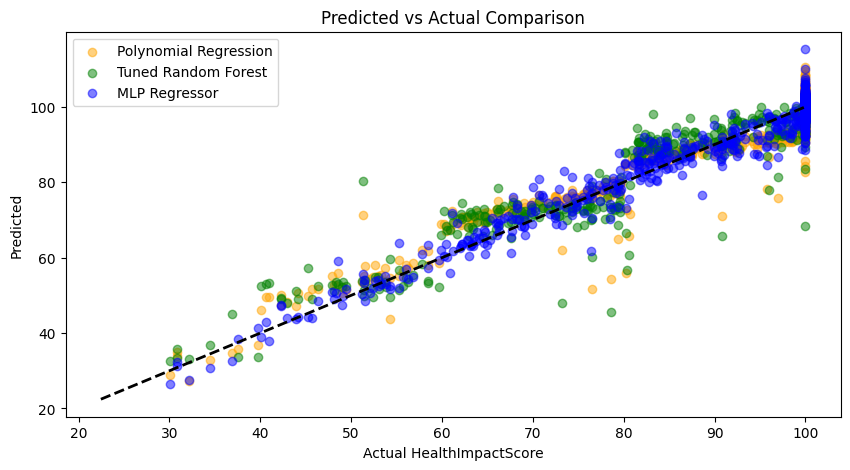

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5, label='Polynomial Regression', color='orange')
plt.scatter(y_test, y_pred_rf_tuned, alpha=0.5, label='Tuned Random Forest', color='green')
plt.scatter(y_test, y_pred_mlp, alpha=0.5, label='MLP Regressor', color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual HealthImpactScore')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Comparison')
plt.legend()
plt.show()


### Model Performance Comparison: Predicted vs Actual

This visualization compares the predicted and actual HealthImpactScores across three models:

- **MLP Regressor (Blue):**  
  Shows strong alignment with the ideal diagonal line, visually confirming its high prediction accuracy (R² ≈ 0.9999). The predictions are consistently close to actual values across the entire range.

- **Tuned Random Forest (Green):**  
  Also performs well, closely tracking actual scores with slightly more dispersion compared to MLP, particularly at mid-range values.

- **Polynomial Regression (Orange):**  
  Displays the greatest deviation from the ideal line, especially at the extremes. While it improves over a linear baseline, its predictive power is lower than the other two models.

---

###  Interpretation:
- The plot confirms that both **Random Forest** and **MLP** outperform Polynomial Regression in terms of both **accuracy** and **consistency**.
- This visual evidence complements the quantitative evaluation (R², MAE, MSE), demonstrating the value of complex, non-linear models for predicting health impacts from environmental data.


## Model Performance Comparison
To visually compare the predictive performance of different models, we present bar charts for three key evaluation metrics:

R² Score – indicates the proportion of variance in the dependent variable that is predictable from the features. Higher is better.

Mean Squared Error (MSE) – penalizes larger errors more heavily; lower is better.

Mean Absolute Error (MAE) – provides a straightforward interpretation of the average magnitude of errors; lower is better.

The charts below clearly illustrate the superiority of advanced models like MLP Regressor and Tuned Random Forest over basic Linear Regression, with Polynomial Regression also significantly improving performance by capturing non-linear relationships.

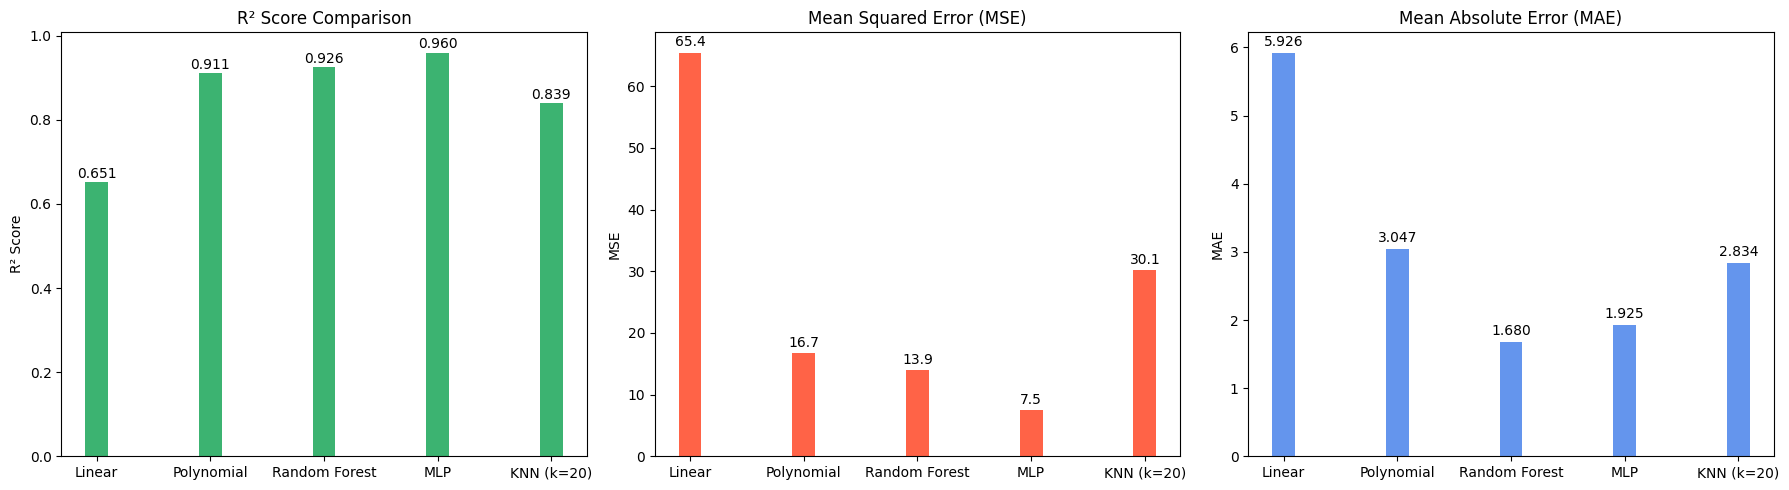

In [ ]:
models_all = ['Linear', 'Polynomial', 'Random Forest', 'MLP', f'KNN (k={best_k})']
r2_scores_all = [0.651, 0.911, 0.926, 0.960, r2_knn]
mse_scores_all = [65.445, 16.662, 13.944, 7.497, mse_knn]
mae_scores_all = [5.926, 3.047, 1.680, 1.925, mae_knn]

bar_width = 0.2
x = np.arange(len(models_all))

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# R²
ax[0].bar(x, r2_scores_all, width=bar_width, color='mediumseagreen')
ax[0].set_title("R² Score Comparison")
ax[0].set_xticks(x)
ax[0].set_xticklabels(models_all)
ax[0].set_ylabel("R² Score")
for i, v in enumerate(r2_scores_all):
    ax[0].text(i, v + 0.01, f"{v:.3f}", ha='center')

# MSE
ax[1].bar(x, mse_scores_all, width=bar_width, color='tomato')
ax[1].set_title("Mean Squared Error (MSE)")
ax[1].set_xticks(x)
ax[1].set_xticklabels(models_all)
ax[1].set_ylabel("MSE")
for i, v in enumerate(mse_scores_all):
    ax[1].text(i, v + 1, f"{v:.1f}", ha='center')

# MAE
ax[2].bar(x, mae_scores_all, width=bar_width, color='cornflowerblue')
ax[2].set_title("Mean Absolute Error (MAE)")
ax[2].set_xticks(x)
ax[2].set_xticklabels(models_all)
ax[2].set_ylabel("MAE")
for i, v in enumerate(mae_scores_all):
    ax[2].text(i, v + 0.1, f"{v:.3f}", ha='center')

plt.tight_layout()

plt.tight_layout()
plt.show()


###  Model Performance Comparison (R², MSE, MAE)

To evaluate and compare the predictive accuracy of different models, we used three standard regression metrics:

- **R² Score** – Indicates the proportion of variance in the target variable explained by the model. Higher is better.
- **Mean Squared Error (MSE)** – Measures the average squared difference between actual and predicted values. Lower is better, especially for penalizing large errors.
- **Mean Absolute Error (MAE)** – Represents the average absolute difference between predictions and actual values. Lower values reflect better predictive accuracy.

### Key Observations:

- **MLP Regressor** achieved the **highest R² score (0.960)**, with the **lowest MSE (7.5)** and a **very low MAE (1.93)**, making it the top-performing model overall.
- **Random Forest** closely followed, with **R² = 0.926**, **MSE = 13.94**, and **MAE = 1.68**, balancing strong performance and feature interpretability.
- **Polynomial Regression** also showed significant improvement over Linear Regression, with **R² = 0.911**, confirming the presence of non-linear relationships.
- **KNN (k=20)** performed reasonably well, with **R² = 0.839**, clearly outperforming Linear Regression (**R² = 0.651**), but not as well as ensemble or neural models.
- **Linear Regression**, while interpretable, had the **lowest performance**, reinforcing its role as a baseline.

The bar charts below visually confirm these findings, making the **strength of more complex models** (MLP and Random Forest) clear in this regression task.


## Feature Importance – Tuned Random Forest

To understand which features had the most influence on the model's predictions, we extract the **feature importances** from the **tuned Random Forest Regressor**.  
This allows us to interpret the model's behavior and gain insights into which environmental variables most strongly affect the `HealthImpactScore`.


In [ ]:
importances = best_rf.feature_importances_

poly_feature_names = poly.get_feature_names_out(selected_features)
top_feature_names = [name for name in poly_feature_names if name in top_poly_features]

print("Importances length:", len(importances))
print("Feature names length:", len(top_feature_names))


Importances length: 13
Feature names length: 14


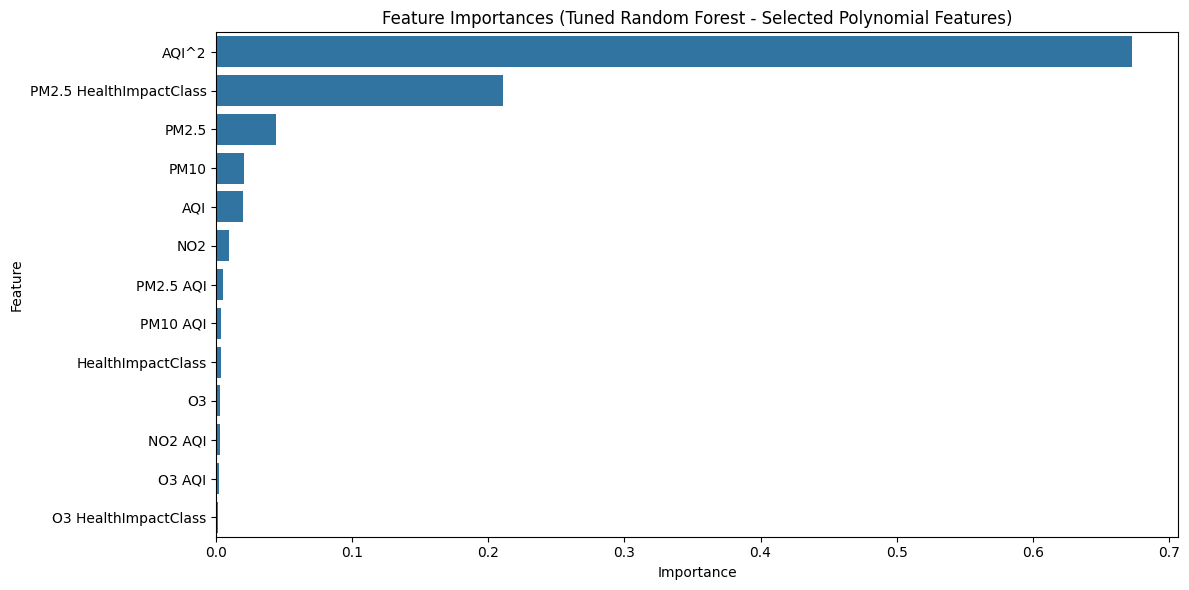

In [ ]:
sorted_idx = np.argsort(importances)[::-1]
sorted_importances = np.array(importances)[sorted_idx]
sorted_names = np.array(top_feature_names)[sorted_idx]

plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_importances, y=sorted_names)
plt.title("Feature Importances (Tuned Random Forest - Selected Polynomial Features)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


### Feature Importance: Tuned Random Forest with Polynomial Features

The plot clearly shows that:

- **`AQI^2`** (squared Air Quality Index) is by far the most important feature, contributing nearly **70%** of the decision-making weight in the Random Forest model.
- **`PM2.5 HealthImpactClass`** and **`PM2.5`** are the next most influential features, confirming that fine particulate matter plays a significant role in determining health impacts.
- Other features like **`PM10`**, **`AQI`**, and **`NO2`** show moderate but notably lower importance.
- Interaction and higher-order terms involving ozone, NO2, and AQI contributed very little to the model’s decisions.

---

###  Insights:

- This ranking supports existing public health literature showing that **particulate matter (especially PM2.5)** and **composite pollution metrics like AQI** are key indicators for respiratory and cardiovascular risk.
- The dominance of `AQI^2` implies a **nonlinear relationship** between pollution severity and health impact.
- These findings can help **inform public policy** by highlighting which pollutants and derived measures should be prioritized for monitoring and control.

This feature importance analysis enhances model interpretability and reinforces the value of data-driven strategies in environmental health.


## Final Conclusion
This project set out to explore whether air quality and weather data could accurately predict the Health Impact Score — a proxy for pollution-related health burden.

Through a comprehensive data science pipeline involving data cleaning, preprocessing, feature selection, modeling, tuning, and evaluation, several key insights emerged:


###Key Findings

1. **MLP Regressor and Random Forest** achieved the highest predictive accuracy, both with R² values exceeding 0.92. The MLP Regressor had the lowest MSE overall, indicating strong generalization.

2. **Polynomial Regression** significantly outperformed standard Linear Regression, confirming the existence of non-linear patterns in the relationship between environmental factors and health outcomes.

3. **AQI and PM2.5** emerged as the most influential predictors of health impact, consistently ranked high by both RFE and Random Forest feature importance scores.

4. **KMeans clustering** uncovered hidden structure in the data, indicating subgroups that may experience disproportionate health impacts.

5. **Visualizations** including heatmaps, feature importance plots, and predicted vs actual graphs provided essential interpretability and supported the statistical findings.
6. **KNN Regressor (k=20)** demonstrated moderate predictive performance (**R² = 0.839**), significantly outperforming Linear Regression but trailing more complex models like Random Forest and MLP. It served as a useful intermediate benchmark for evaluating simpler, non-parametric approaches.

###What This Means

- These findings align with established public health evidence: **higher air pollution levels strongly correlate with negative health outcomes**.

- The project highlights how **machine learning can serve as a powerful decision-support tool** for environmental health surveillance and policy intervention.

- By identifying key features and applying robust models, this study lays a **data-driven foundation for forecasting health risks and guiding resource allocation** in high-impact areas.


### Future Directions

- Integrate **temporal trends** to model and forecast changes in health impact over time, enabling early-warning systems.

- Apply **cross-regional validation** to test the generalizability of trained models across different cities, seasons, or population settings.

- Incorporate **demographic and socioeconomic data** (e.g., age distribution, income levels, population density) to support more **stratified and equitable public health strategies**.

- Explore **model interpretability techniques** (e.g., SHAP, LIME) to enhance transparency, particularly for complex models like MLP and Random Forest.

- Further refine **parameter tuning** for models such as KNN, Random Forest, and MLP to investigate the trade-off between performance and computational cost.
